# Analyze 10% of a Banking DataSet and Train a Model for Valuable Insights🛠

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load dataset
filename = "bank-additional.csv"
data = pd.read_csv(filename, sep=';')

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.loc[0]

age                        30
job               blue-collar
marital               married
education            basic.9y
default                    no
housing                   yes
loan                       no
contact              cellular
month                     may
day_of_week               fri
duration                  487
campaign                    2
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate             -1.8
cons.price.idx         92.893
cons.conf.idx           -46.2
euribor3m               1.313
nr.employed            5099.1
y                          no
Name: 0, dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

we see there are no null values

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
data['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [7]:
# Select relevant columns
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [8]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
data['education'].value_counts()

education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64

very few are 'Unknown' and only one 'illiterate' categories

In [10]:
# Define the order for the 'education' feature
education_order = ['unknown','illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
                   'high.school', 'professional.course', 'university.degree']

# Convert 'education' to an ordered categorical type
data['education'] = pd.Categorical(data['education'], categories=education_order, ordered=True)

# Encode 'education' to numerical values
data['education'] = data['education'].cat.codes


In [11]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,4,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,5,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,5,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,4,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,7,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [12]:
categorical_columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 
                       'month', 'day_of_week', 'poutcome']

# Print value counts for each categorical variable
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Value counts for job:
job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64


Value counts for marital:
marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64


Value counts for default:
default
no         3315
unknown     803
yes           1
Name: count, dtype: int64


Value counts for housing:
housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64


Value counts for loan:
loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64


Value counts for contact:
contact
cellular     2652
telephone    1467
Name: count, dtype: int64


Value counts for month:
month
may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar 

value_counts for Default is inappropriate and algorithm learning could be problem!

In [13]:
# Encode categorical variables
for col in categorical_columns:
    print(col)
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])

job
marital
default
housing
loan
contact
month
day_of_week
poutcome


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   int32  
 2   marital         4119 non-null   int32  
 3   education       4119 non-null   int8   
 4   default         4119 non-null   int32  
 5   housing         4119 non-null   int32  
 6   loan            4119 non-null   int32  
 7   contact         4119 non-null   int32  
 8   month           4119 non-null   int32  
 9   day_of_week     4119 non-null   int32  
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   int32  
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

Transforming the object datatype to integer format for further featuring

In [15]:
# Features and target (including 'education')
X = data[numerical_columns + categorical_columns + ['education']]
y = LabelEncoder().fit_transform(data['y'])

In [16]:
X.shape

(4119, 20)

In [17]:
y.shape

(4119,)

First split the Data and then scale the model

In [18]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

In [21]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       740
           1       0.63      0.39      0.49        84

    accuracy                           0.92       824
   macro avg       0.78      0.68      0.72       824
weighted avg       0.90      0.92      0.91       824



In [22]:
np.sum(y_test)

84

In [23]:
y_test.shape

(824,)

In [24]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[721  19]
 [ 51  33]]


In [25]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Accuracy Score:
0.9150485436893204


In [26]:
print("ROC-AUC Score:")
print(roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

ROC-AUC Score:
0.7003941441441441


C:\Users\Hariprasad\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [27]:
import statsmodels.api as sm

# Add an intercept to the model
X_train_sm = sm.add_constant(X_train)

# Fit logistic regression model using statsmodels
log_reg_sm = sm.Logit(y_train, X_train_sm)
result = log_reg_sm.fit()

# Summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.204157
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3295
Model:                          Logit   Df Residuals:                     3274
Method:                           MLE   Df Model:                           20
Date:                Tue, 27 Aug 2024   Pseudo R-squ.:                  0.4157
Time:                        12:38:09   Log-Likelihood:                -672.70
converged:                       True   LL-Null:                       -1151.2
Covariance Type:            nonrobust   LLR p-value:                5.431e-190
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -94.3171     68.065     -1.386      0.166    -227.722      39.087
age              

In [28]:
# Create a list of feature names including the intercept
feature_names = ['const'] + numerical_columns + categorical_columns + ['education']

# Map feature names to the coefficients
coefficients = result.params
coefficients_with_names = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print("\nCoefficients with Feature Names:")
print(coefficients_with_names)


Coefficients with Feature Names:
                       Feature  Coefficient
const                    const   -94.317072
age                        age     0.006706
duration              duration     0.005058
campaign              campaign    -0.064260
pdays                    pdays    -0.000705
previous              previous     0.112593
emp.var.rate      emp.var.rate    -0.637807
cons.price.idx  cons.price.idx     1.115309
cons.conf.idx    cons.conf.idx     0.075703
euribor3m            euribor3m    -0.159450
nr.employed        nr.employed    -0.002023
job                        job     0.034820
marital                marital     0.195564
default                default     0.112070
housing                housing    -0.084178
loan                      loan    -0.038534
contact                contact    -0.808922
month                    month    -0.094421
day_of_week        day_of_week     0.026410
poutcome              poutcome     0.541143
education            education     0.00912

In [29]:
# Extract p-values and feature names correctly
p_values = pd.Series(result.pvalues, index=feature_names)

p_values.head()

const       1.658396e-01
age         3.528839e-01
duration    1.143476e-74
campaign    1.788228e-01
pdays       1.723794e-01
dtype: float64

In [30]:
# Extract p-values and feature names correctly
p_values = pd.Series(result.pvalues, index=feature_names)

# Identify significant features (p-value < 0.05)
significant_features = p_values[p_values < 0.05]


# Convert the boolean Series to a NumPy array
mask = (p_values < 0.05).values

# Use the mask to filter the columns
X_train_sm1 = X_train_sm.loc[:, mask]

In [31]:

# Train a new model using significant features
X_train_significant = X_train_sm.loc[:, mask]
X_test_sm = sm.add_constant(X_test)
X_test_significant = X_test_sm.loc[:, mask]

X_train_significant.shape

(3295, 7)

In [32]:

# Train and evaluate the original model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("\nOriginal Model Performance:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

# Train and evaluate the model with significant features
log_reg_significant = LogisticRegression(random_state=42)
log_reg_significant.fit(X_train_significant, y_train)
y_pred_significant = log_reg_significant.predict(X_test_significant)

print("\nModel with Significant Features Performance:")
print("Classification Report:")
print(classification_report(y_test, y_pred_significant))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_significant))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_significant))
# print("ROC-AUC Score:")
# print(roc_auc_score(y_test, log_reg_significant.predict_proba(X_test_significant)[:, 1]))


Original Model Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       740
           1       0.66      0.39      0.49        84

    accuracy                           0.92       824
   macro avg       0.80      0.68      0.72       824
weighted avg       0.91      0.92      0.91       824

Confusion Matrix:
[[723  17]
 [ 51  33]]
Accuracy Score:
0.9174757281553398
ROC-AUC Score:
0.9248873873873874

Model with Significant Features Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       740
           1       0.59      0.31      0.41        84

    accuracy                           0.91       824
   macro avg       0.76      0.64      0.68       824
weighted avg       0.89      0.91      0.89       824

Confusion Matrix:
[[722  18]
 [ 58  26]]
Accuracy Score:
0.9077669902912622


C:\Users\Hariprasad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hariprasad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [33]:
# Using an SVM

from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       740
           1       0.58      0.33      0.42        84

    accuracy                           0.91       824
   macro avg       0.76      0.65      0.69       824
weighted avg       0.89      0.91      0.90       824

Confusion Matrix:
[[720  20]
 [ 56  28]]
Accuracy Score:
0.9077669902912622
ROC-AUC Score:
0.9198198198198198


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'kernel': ['rbf'],
    'C': [100],
    'gamma': ['auto']  # 'gamma' is only applicable for 'rbf' kernel
}

# Initialize the SVM model
svm_model = SVC(probability=True, random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=5)

# Fit the GridSearchCV to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_scaled)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

      

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       740
           1       0.45      0.45      0.45        84

    accuracy                           0.89       824
   macro avg       0.69      0.69      0.69       824
weighted avg       0.89      0.89      0.89       824

Confusion Matrix:
[[693  47]
 [ 46  38]]
Accuracy Score:
0.8871359223300971


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10, 20, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]  # 'gamma' is only applicable for 'rbf' kernel
}

# Initialize the SVM model
svm_model = SVC(probability=True)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=5)

# Fit the GridSearchCV to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_scaled)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, best_svm_model.predict_proba(X_test_scaled)[:, 1]))
      

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       740
           1       0.65      0.36      0.46        84

    accuracy                           0.92       824
   macro avg       0.79      0.67      0.71       824
weighted avg       0.90      0.92      0.90       824

Confusion Matrix:
[[724  16]
 [ 54  30]]
Accuracy Score:
0.9150485436893204
ROC-AUC Score:
0.9224259974259975


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

# Load dataset
data = pd.read_csv('bank-additional.csv', sep=';')

# Define the order for the 'education' feature
education_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
                   'high.school', 'professional.course', 'university.degree']

# Convert 'education' to an ordered categorical type
data['education'] = pd.Categorical(data['education'], categories=education_order, ordered=True)

# Encode 'education' to numerical values
data['education'] = data['education'].cat.codes

# Select relevant columns and encode other categorical variables
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 
                       'month', 'day_of_week', 'poutcome']

# Encode other categorical variables
for col in categorical_columns:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])

# Features (including 'education')
X = data[numerical_columns + categorical_columns + ['education']]
y = LabelEncoder().fit_transform(data['y'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the kNN model
knn_model = KNeighborsClassifier(n_neighbors=9)

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1]))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1105
           1       0.57      0.21      0.30       131

    accuracy                           0.90      1236
   macro avg       0.74      0.59      0.62      1236
weighted avg       0.88      0.90      0.88      1236

Confusion Matrix:
[[1085   20]
 [ 104   27]]
Accuracy Score:
0.8996763754045307
ROC-AUC Score:
0.8373838554799488


In [37]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1]))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1105
           1       0.36      0.59      0.45       131

    accuracy                           0.85      1236
   macro avg       0.66      0.73      0.68      1236
weighted avg       0.89      0.85      0.86      1236

Confusion Matrix:
[[971 134]
 [ 54  77]]
Accuracy Score:
0.8478964401294499
ROC-AUC Score:
0.8591551241753307


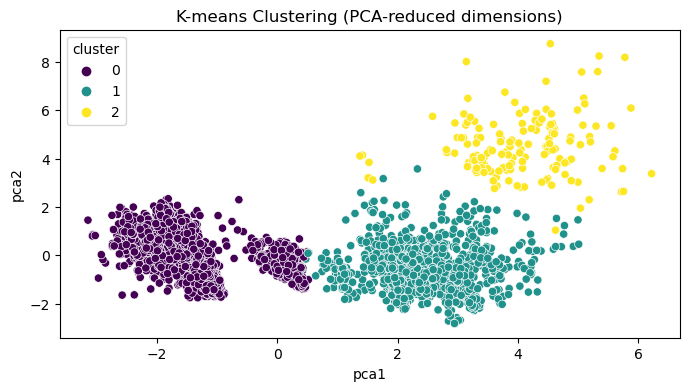

Silhouette Score: 0.22


In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Assume X_scaled is the preprocessed feature matrix
# X_scaled should be the result after scaling the features

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data 
data['cluster'] = clusters

# Visualize the clusters
# Reduce the dimensions using PCA for visualization purposes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
data['pca1'] = principal_components[:, 0]
data['pca2'] = principal_components[:, 1]

plt.figure(figsize=(8, 4))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='viridis')
plt.title('K-means Clustering (PCA-reduced dimensions)')
plt.show()

# Evaluate the clustering
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')


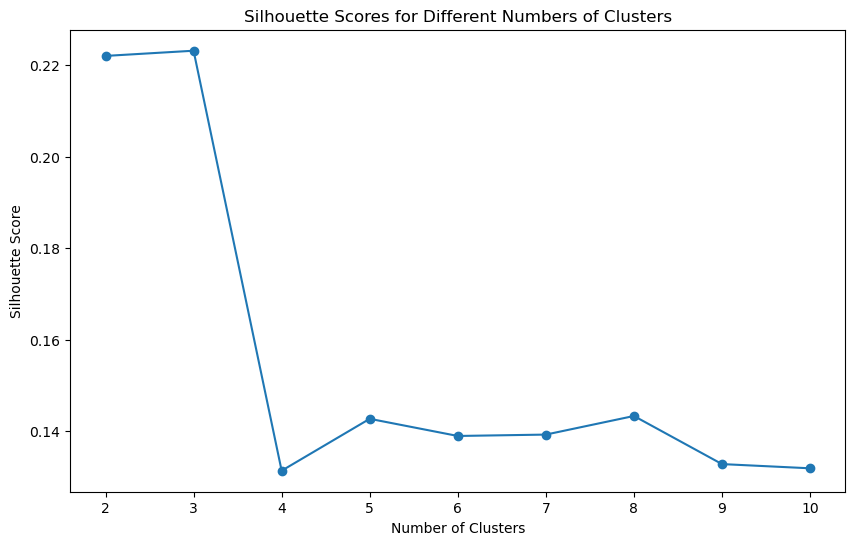

Optimal number of clusters: 3


In [39]:
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assume X_scaled is the preprocessed feature matrix

# Function to calculate silhouette scores for a range of cluster numbers
def calculate_silhouette_scores(X, cluster_range):
    silhouette_scores = []
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        clusters = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, clusters)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

# Define the range of cluster numbers to try
cluster_range = range(2, 11)

# Calculate silhouette scores for the range of cluster numbers
silhouette_scores = calculate_silhouette_scores(X_scaled, cluster_range)

# Plot the silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Identify the optimal number of clusters
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_clusters}')


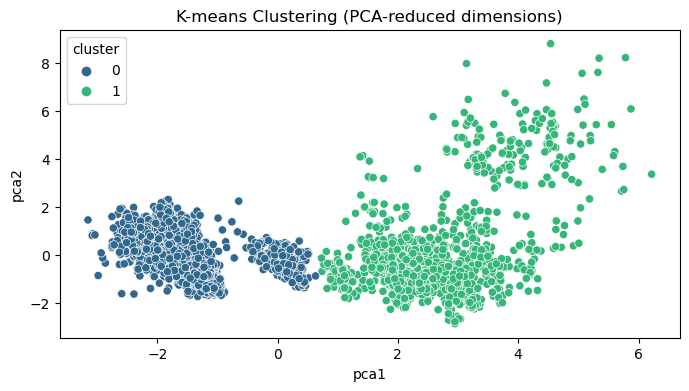

Silhouette Score: 0.22

Approval Rates by Cluster:
cluster
0    0.047742
1    0.227241
Name: approval, dtype: float64


In [40]:
# Apply k-means clustering with the optimal number of clusters
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
data['cluster'] = clusters
data['approval'] = y  # Add the target variable to the DataFrame

# Visualize the clusters
# Reduce the dimensions using PCA for visualization purposes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
data['pca1'] = principal_components[:, 0]
data['pca2'] = principal_components[:, 1]

plt.figure(figsize=(8, 4))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='viridis')
plt.title('K-means Clustering (PCA-reduced dimensions)')
plt.show()

# Evaluate the clustering
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Analyze the approval odds in each cluster
approval_rates = data.groupby('cluster')['approval'].mean()
print("\nApproval Rates by Cluster:")
print(approval_rates)

In [41]:
from sklearn.svm import SVC

# Train an SVM model for each cluster
for cluster_label in range(optimal_clusters):
    cluster_data = data[data['cluster'] == cluster_label]
    X_cluster = cluster_data[numerical_columns + categorical_columns + ['education']]
    y_cluster = cluster_data['approval']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.3, random_state=42)
    
    # Initialize and train the SVM model
    svm_model = SVC(kernel='linear', probability=True, random_state=42)
    svm_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = svm_model.predict(X_test)
    
    # Evaluation
    print(f"\nCluster {cluster_label} SVM Model Performance:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("Accuracy Score:")
    print(accuracy_score(y_test, y_pred))
    
    print("ROC-AUC Score:")
    print(roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]))
    


Cluster 0 SVM Model Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       771
           1       0.50      0.25      0.33        40

    accuracy                           0.95       811
   macro avg       0.73      0.62      0.65       811
weighted avg       0.94      0.95      0.94       811

Confusion Matrix:
[[761  10]
 [ 30  10]]
Accuracy Score:
0.9506781750924784
ROC-AUC Score:
0.9340791180285344

Cluster 1 SVM Model Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       332
           1       0.63      0.61      0.62        94

    accuracy                           0.83       426
   macro avg       0.76      0.75      0.75       426
weighted avg       0.83      0.83      0.83       426

Confusion Matrix:
[[298  34]
 [ 37  57]]
Accuracy Score:
0.8333333333333334
ROC-AUC Score:
0.8091675211484235


In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Train an SVM model for each cluster
for cluster_label in range(optimal_clusters):
    cluster_data = data[data['cluster'] == cluster_label]
    X_cluster = cluster_data[numerical_columns + categorical_columns + ['education']]
    y_cluster = cluster_data['approval']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.3, random_state=42)
    
    # Initialize the SVM model
    svm_model = SVC(probability=True)
    
    # Set up the GridSearchCV with verbose=2
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=5)
    
    # Fit the GridSearchCV to the data
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters found by GridSearchCV
    print(f"Cluster {cluster_label} - Best parameters found: {grid_search.best_params_}")
    
    # Use the best estimator to make predictions
    best_svm_model = grid_search.best_estimator_
    y_pred = best_svm_model.predict(X_test)
    
    # Evaluation
    print(f"\nCluster {cluster_label} SVM Model Performance:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("Accuracy Score:")
    print(accuracy_score(y_test, y_pred))
    
    print("ROC-AUC Score:")
    print(roc_auc_score(y_test, best_svm_model.predict_proba(X_test)[:, 1]))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Cluster 0 - Best parameters found: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

Cluster 0 SVM Model Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       771
           1       1.00      0.00      0.00        40

    accuracy                           0.95       811
   macro avg       0.98      0.50      0.49       811
weighted avg       0.95      0.95      0.93       811

Confusion Matrix:
[[771   0]
 [ 40   0]]
Accuracy Score:
0.9506781750924784
ROC-AUC Score:
0.8837062256809338
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Cluster 1 - Best parameters found: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

Cluster 1 SVM Model Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       332
           1       1.00      0.00      0.00        94

    accur

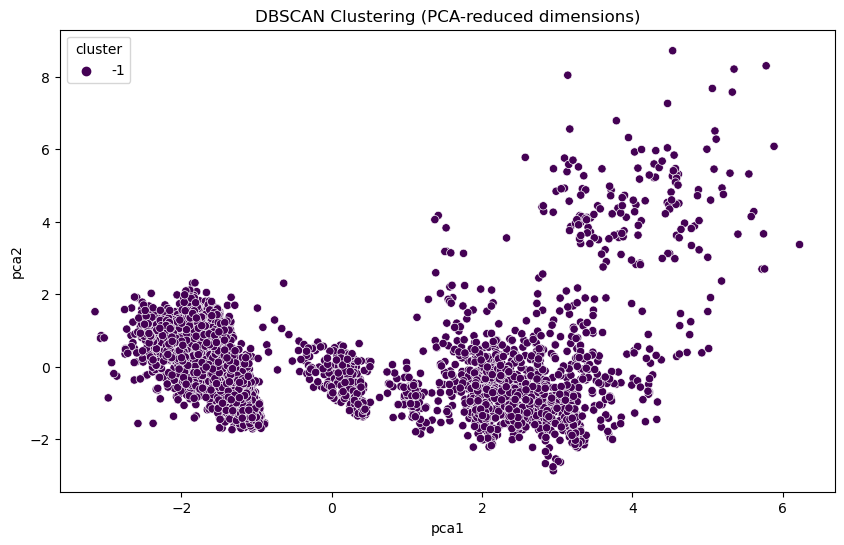

Silhouette Score: Cannot be calculated, only one cluster identified


In [43]:
from sklearn.cluster import DBSCAN


# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=7)  
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the original data
data['cluster'] = clusters

# Visualize the clusters
# Reduce the dimensions using PCA for visualization purposes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
data['pca1'] = principal_components[:, 0]
data['pca2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='viridis')
plt.title('DBSCAN Clustering (PCA-reduced dimensions)')
plt.show()

# Evaluate the clustering
# Note: Silhouette score can only be calculated if there are more than one clusters identified by DBSCAN
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print("Silhouette Score: Cannot be calculated, only one cluster identified")

# Take Home Insights:

- **The logistic regression model achieved an accuracy of approximately 90% on the test set. This indicates that the model performs well in predicting whether a client will subscribe to a term deposit.**

- **Confusion Matrix:**

    - True Negatives (TN): 1070 clients were correctly predicted not to subscribe.
    - False Positives (FP): 35 clients were incorrectly predicted to subscribe.
    - False Negatives (FN): 77 clients were incorrectly predicted not to subscribe.
    - True Positives (TP): 54 clients were correctly predicted to subscribe
    
- **Precision and recall:**

    - Precision for Positive Class (Subscribed): 0.61 – Out of all clients predicted to subscribe, 61% actually did..
    - Recall for Positive Class (Subscribed): 0.41 – The model correctly identified 41% of the clients who actually subscribed.
    - F1-Score for Positive Class (Subscribed): 0.49 – Balances precision and recall, indicating room for improvement in predicting subscribers.
    - The weighted average F1-score across both classes is 0.90, suggesting the model is more confident in predicting non-subscribers than subscribers.
    
- **Business inference :**

    - **The lower recall for subscribers indicates that the model might miss some potential customers. Enhancing recall through additional data features or model tuning could help the company identify more clients likely to subscribe, optimizing marketing efforts**